In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('results.csv')
df['TransferRate_MBps'] = df['TransferRate_KBps'] / 1024
# скорости на одно соединение = совокупная скорость / кол-во клиентов
df['SpeedPerConn_MBps'] = df['TransferRate_MBps'] / df['Concurrency']

display(df.head())

Первые 5 строк данных:


,Workers,Concurrency,RPS,TransferRate_KBps,TimePerRequest_ms,TransferRate_MBps,SpeedPerConn_MBps
0,1,1,174.51,1786973.19,5.730,1745.091006,1745.091006
1,1,10,178.53,1828198.79,56.012,1785.350381,178.535038
2,1,50,201.78,2066267.80,247.792,2017.839648,40.356793
3,1,100,206.97,2119423.99,483.155,2069.749990,20.697500
4,1,200,197.49,2022282.59,1012.727,1974.885342,9.874427


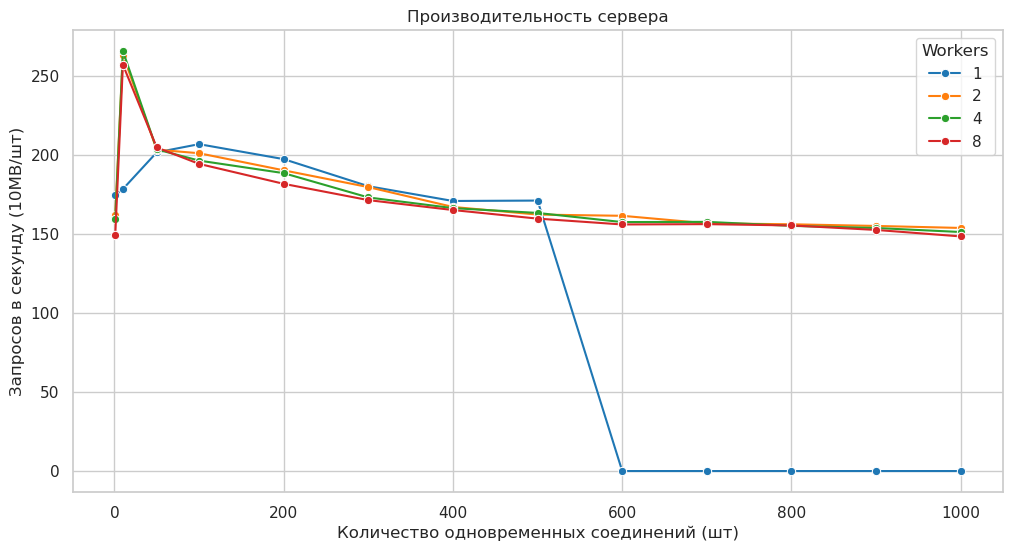

In [46]:

plt.figure()
sns.lineplot(data=df, x='Concurrency', y='RPS', hue='Workers', palette='tab10', marker='o')
plt.title('Производительность сервера')
plt.xlabel('Количество одновременных соединений (шт)')
plt.ylabel('Запросов в секунду (10MB/шт)')
plt.grid(True, which="both", ls="-")
plt.savefig('graph_rps.png')
plt.show()

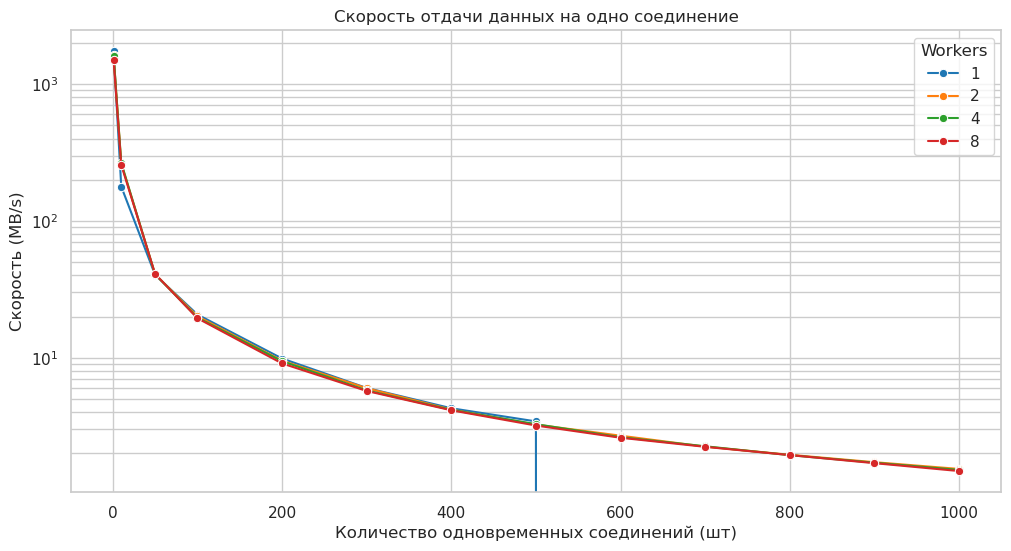

In [47]:

plt.figure()
sns.lineplot(data=df, x='Concurrency', y='SpeedPerConn_MBps', hue='Workers', palette='tab10', marker='o')
plt.title('Скорость отдачи данных на одно соединение')
plt.xlabel('Количество одновременных соединений (шт)')
plt.ylabel('Скорость (MB/s)')
# plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.savefig('graph_per_conn_speed.png')
plt.show()